In [83]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
from datetime import datetime
import plotly.express as px

In [187]:
df = pd.read_csv('draw_12.csv')
df

,X,Y,Pressure,TiltX,TiltY,Time
0,688.818570273704,526.514378,0.071031,-4515.0,2197.0,00:18.1988702
1,688.66058436309,525.724449,0.078355,-4515.0,2197.0,00:18.2144819
2,688.29195057166,523.670632,0.089586,-4515.0,2197.0,00:18.2302213
3,687.607344959002,520.405590,0.152819,-4515.0,2197.0,00:18.2458102
4,686.764753435732,517.719829,0.191394,-4515.0,2197.0,00:18.2613566
...,...,...,...,...,...,...
524,744.008315047927,252.882781,0.682612,-2757.0,-1514.0,00:27.5764537
525,745.324864303037,252.988105,0.672847,-2757.0,-1514.0,00:27.5920828
526,747.852638872849,253.304077,0.630610,-2757.0,-1514.0,00:27.6077052
527,Time Elapsed till drawing started: 00:04.9671808,NaN,NaN,NaN,NaN,NaN


In [190]:
df.dtypes

X             object
 Y           float64
 Pressure    float64
 TiltX       float64
 TiltY       float64
 Time         object
dtype: object

In [191]:
df['X'] = df['X'].loc[0:526].astype(float)
# df[' Time'] = pd.to_datetime(df[' Time'])

In [192]:
Distance = []
for i in range(529):
    if(i==527 or i==528):
        Distance.append(None)
    else:
        p1 = [df['X'].loc[i], df[' Y'].loc[i]]
        p2 = [df['X'].loc[i+1], df[' Y'].loc[i+1]]
        Distance.append(math.dist(p1, p2))
df['Distance'] = Distance

In [193]:
df

,X,Y,Pressure,TiltX,TiltY,Time,Distance
0,688.818570,526.514378,0.071031,-4515.0,2197.0,00:18.1988702,0.805573
1,688.660584,525.724449,0.078355,-4515.0,2197.0,00:18.2144819,2.086637
2,688.291951,523.670632,0.089586,-4515.0,2197.0,00:18.2302213,3.336043
3,687.607345,520.405590,0.152819,-4515.0,2197.0,00:18.2458102,2.814830
4,686.764753,517.719829,0.191394,-4515.0,2197.0,00:18.2613566,3.326053
...,...,...,...,...,...,...,...
524,744.008315,252.882781,0.682612,-2757.0,-1514.0,00:27.5764537,1.320755
525,745.324864,252.988105,0.672847,-2757.0,-1514.0,00:27.5920828,2.547446
526,747.852639,253.304077,0.630610,-2757.0,-1514.0,00:27.6077052,NaN
527,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# for i in range(527):
#     df[' Time'].loc[i] = df[' Time'].loc[i].strftime('%H:%M:%S')
#     df[' Time'].loc[i] = df[' Time'].loc[i].strptime(df[' Time'].loc[i], '%H:%M:%S')

In [229]:
# datetime.strptime(df[' Time'].loc[0], "%d/%m/%Y %H:%M:%S")

In [230]:
# df[' Time'] =
# df[' Time'].loc[0].strftime('%H:%M:%S')

In [172]:
df.dtypes

X            float64
 Y           float64
 Pressure    float64
 TiltX       float64
 TiltY       float64
 Time         object
Distance     float64
dtype: object

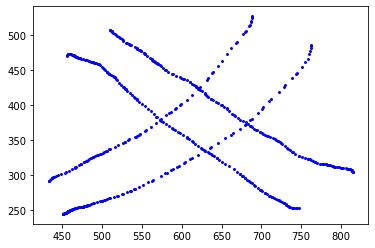

In [159]:
plt.scatter(df['X'], df[' Y'], s = 15, c = 'b', marker = '.')

In [210]:
import plotly.graph_objects as go

# Generate curve data
x = df['X']
y = df[' Y']
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="markers",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     mode="markers",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, {"frame": {"duration": 50, 
                                                                        "redraw": False},
                                                              "fromcurrent": True, 
                                                              "transition": {"duration": 0}}])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[df['X'].loc[k]],
            y=[df[' Y'].loc[k]],
            mode="markers",
            marker=dict(color="red", size=15))])

        for k in range(526)]
)

fig.show()